## 1. 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [4]:
print(f"Y_train shape: {y_train.shape}")

Y_train shape: (60000,)


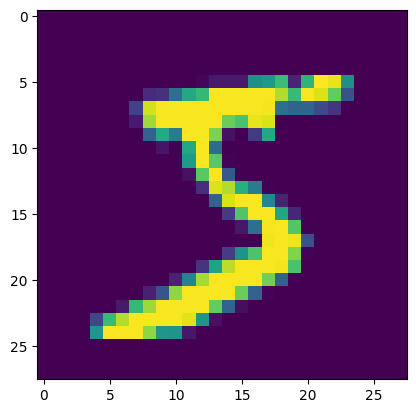

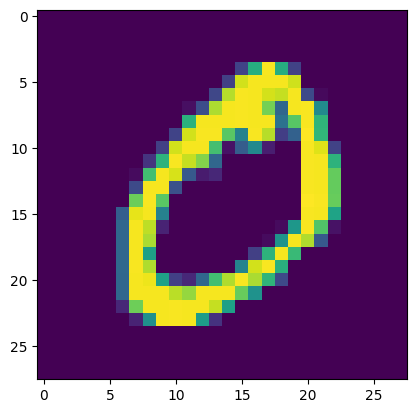

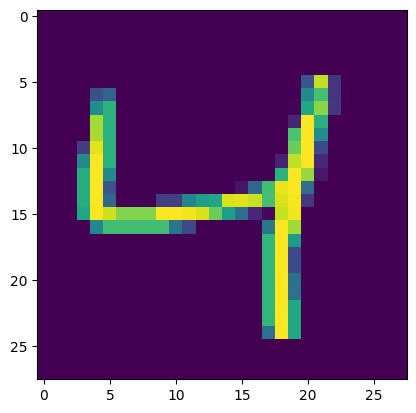

In [5]:
for i in range(len(X_train[:3])):
    plt.imshow(X_train[i])
    plt.show()

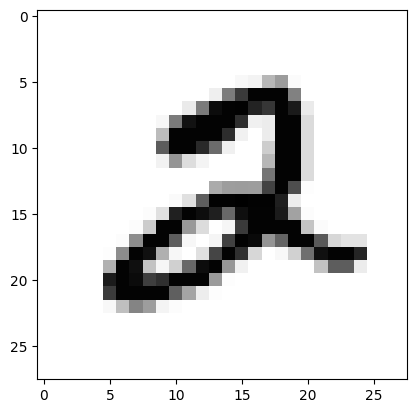

(60000, 28, 28)


In [6]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[5], cmap='Greys')
plt.show()
print(X_train.shape)

In [7]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[3]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n') #\ left at back space

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  12425325563 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  96 24425125362 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  12725125125362 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  68 23625121131 8  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  60 22825125194 0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1552532531890  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  20 25325123566 0  0  0 

In [8]:
y_train[0]

5

In [9]:
# One-Hot Encording
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255 # 값의 범위가 [0 ~ 1.0]이 됨

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
print(f"After One-Hot Encoding: {y_train.shape}")

After One-Hot Encoding: (60000, 10)


## 2. 딥러닝 기본 프레임 만들기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다. One-Hot Encording
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # input_dim(img size): 28x28
model.add(Dense(10, activation='softmax'))  # multi classification -> 'sofxmax' function
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',  # multi-classification 할 때 'categorical_crossentropy' 사용
              optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
# modelpath="./MNIST_MLP.keras"   
checkpointer = ModelCheckpoint(filepath=modelpath, # check_point save path
                               monitor='val_loss',  # 'val_loss'기준으로 저장
                               verbose=1, save_best_only=True)  # save only best model

# 10 epochs 동안 'val_loss' 변동 없으면 Early_Stop
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# Save Model .hdf5
# model.save("MNIST_MLP.hdf5")


Epoch 1: val_loss improved from inf to 0.19107, saving model to .\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.19107 to 0.13449, saving model to .\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13449 to 0.11647, saving model to .\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11647 to 0.10632, saving model to .\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10632 to 0.09463, saving model to .\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09463 to 0.08371, saving model to .\MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08371

Epoch 8: val_loss did not improve from 0.08371

Epoch 9: val_loss did not improve from 0.08371

Epoch 10: val_loss improved from 0.08371 to 0.08096, saving model to .\MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.08096 to 0.08080, saving model to .\MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.08080

Epoch 13: val_loss did not improve from 0.08080

Epoch 14: val_loss did not improve from 0.08080

Epoch 15: val_loss did

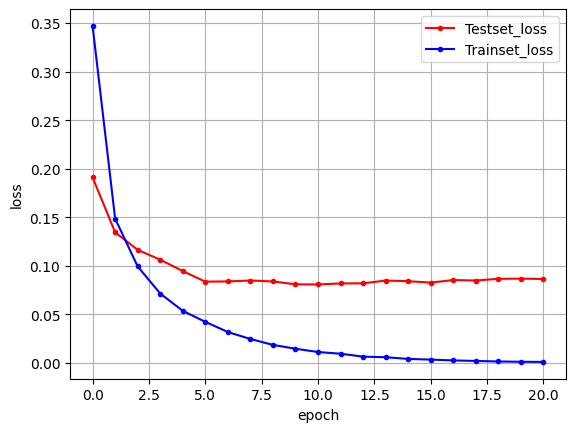

In [13]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 5. 컨볼루션 신경망 실행하기

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Data Scaling
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# One-Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1),   # feature 추출
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    # img size축소, 연산량을 줄임
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [15]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# Save Model .hdf5
modelpath = modelpath.replace("keras", "hdf5")
model.save(modelpath)


Epoch 1: val_loss improved from inf to 0.08282, saving model to .\MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08282 to 0.05883, saving model to .\MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05883 to 0.05519, saving model to .\MNIST_CNN.keras

Epoch 4: val_loss improved from 0.05519 to 0.04737, saving model to .\MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04737 to 0.04016, saving model to .\MNIST_CNN.keras

Epoch 6: val_loss did not improve from 0.04016

Epoch 7: val_loss did not improve from 0.04016

Epoch 8: val_loss improved from 0.04016 to 0.03914, saving model to .\MNIST_CNN.keras

Epoch 9: val_loss did not improve from 0.03914

Epoch 10: val_loss did not improve from 0.03914

Epoch 11: val_loss did not improve from 0.03914

Epoch 12: val_loss did not improve from 0.03914

Epoch 13: val_loss did not improve from 0.03914

Epoch 14: val_loss did not improve from 0.03914

Epoch 15: val_loss did not improve from 0.03914

Epoch 16: val_loss did not improve from 0.0

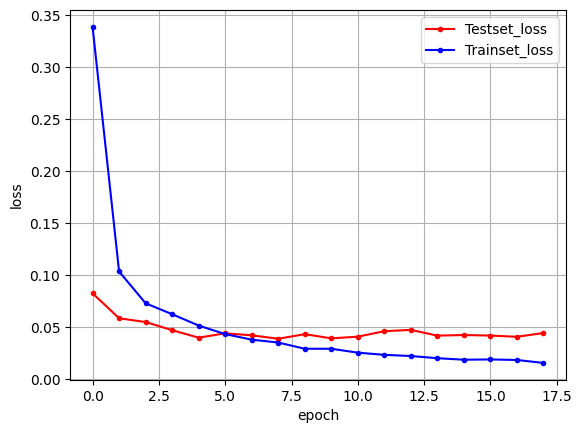

In [17]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()